In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import jarque_bera
from scipy.stats import f_oneway

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
#store the data in 'youtube_views'
youtube_views = pd.read_csv("train.csv")

#display first five observations using head()
youtube_views.head()

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.000000,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.000000,21,6,,FALSE,FALSE,13342,6089,False,1978978,nan,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.000000,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.000000,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,nan,NaN
2,QTW28IRG36,23,Rudy Mancuso,4191209.000000,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,10.000000,22,3,257850,TRUE,TRUE,0,0,True,1502102,nan,NaN
3,MGL76WI]26,24,Good Mythical Morning,13186408.000000,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,12.000000,17,5,263939,TRUE,TRUE,0,0,True,3519302,nan,NaN
4,TWP93KXT70,24,nigahiga,20563106.000000,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,11.000000,15,7,268085,TRUE,TRUE,0,0,True,4835374,nan,NaN


In [4]:
youtube_views.drop(['Video_id', 'channel_title', 'title', 'tags','description' , 'Unnamed: 17','Unnamed: 18'], axis = 1, inplace = True)

#displaying first 10 observation
youtube_views.head(10)

,category_id,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,22,9086142.000000,6.000000,21,6,,FALSE,FALSE,13342,6089,False,1978978
1,24,5937292.000000,1.000000,23,1,116266,TRUE,FALSE,5761,3044,False,1487870
2,23,4191209.000000,10.000000,22,3,257850,TRUE,TRUE,0,0,True,1502102
3,24,13186408.000000,12.000000,17,5,263939,TRUE,TRUE,0,0,True,3519302
4,24,20563106.000000,11.000000,15,7,268085,TRUE,TRUE,0,0,True,4835374
5,28,4652602.000000,10.000000,9,1,198248,TRUE,FALSE,8619,3697,True,1580238
6,24,5292034.000000,4.000000,17,5,,FALSE,FALSE,9951,937,False,1204461
7,28,10474796.000000,9.000000,14,7,103280,TRUE,FALSE,18010,11026,True,2542878
8,1,2453494.000000,8.000000,20,1,214583,TRUE,FALSE,12126,7855,True,1090597
9,25,3808198.000000,11.000000,8,2,223434,TRUE,TRUE,0,0,True,1407313


In [5]:
youtube_views.shape

(3198, 12)

In [6]:
youtube_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category_id            3192 non-null   object 
 1   subscriber             3175 non-null   float64
 2   Trend_day_count        3197 non-null   float64
 3   Tag_count              3197 non-null   object 
 4   Trend_tag_count        3197 non-null   object 
 5   comment_count          3198 non-null   object 
 6   comment_disabled       3198 non-null   object 
 7   like dislike disabled  3198 non-null   object 
 8   likes                  3198 non-null   object 
 9   dislike                3198 non-null   object 
 10  tag appered in title   3197 non-null   object 
 11  views                  3198 non-null   object 
dtypes: float64(2), object(10)
memory usage: 299.9+ KB


In [7]:
#storing all the numeric data in 'df_numeric_features'
#select_dtypes() selects the datatype 
df_numeric_features = youtube_views.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features.head()

,subscriber,Trend_day_count
0,9086142.000000,6.000000
1,5937292.000000,1.000000
2,4191209.000000,10.000000
3,13186408.000000,12.000000
4,20563106.000000,11.000000


In [8]:
df_categorical_features = youtube_views.select_dtypes(include=[np.object])

# display categorical features
df_categorical_features.head()

,category_id,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
0,22,21,6,,FALSE,FALSE,13342,6089,False,1978978
1,24,23,1,116266,TRUE,FALSE,5761,3044,False,1487870
2,23,22,3,257850,TRUE,TRUE,0,0,True,1502102
3,24,17,5,263939,TRUE,TRUE,0,0,True,3519302
4,24,15,7,268085,TRUE,TRUE,0,0,True,4835374


In [9]:
#creating a function 'imputeTrainNull'
#pd.to_numeric converts respective column to numeric data

def imputeTrainNull(data):    
    data.Trend_day_count = pd.to_numeric(data.Trend_day_count, errors='coerce')
    data.Tag_count = pd.to_numeric(data.Tag_count, errors='coerce')
    data.likes = pd.to_numeric(data.likes, errors='coerce')
    data.dislike = pd.to_numeric(data.dislike, errors='coerce')
    data.views = pd.to_numeric(data.views, errors='coerce')
    data.comment_count = pd.to_numeric(data.comment_count, errors='coerce')
    data.Trend_tag_count = pd.to_numeric(data.Trend_tag_count, errors='coerce')
    print(data.isnull().sum())

#passing the youtube_views to respective function    
#calling function    
imputeTrainNull(youtube_views)

category_id                 6
subscriber                 23
Trend_day_count             1
Tag_count                   2
Trend_tag_count             3
comment_count            1015
comment_disabled            0
like dislike disabled       0
likes                       1
dislike                     1
tag appered in title        1
views                       1
dtype: int64


In [10]:
#storing all the numeric data in 'df_numeric_features'
#select_dtypes() selects the datatype 
#checking the new count after conversion

df_numeric_features =  youtube_views.select_dtypes(include=[np.number])

df_numeric_features.head()
#df_categorical_features

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views
0,9086142.000000,6.000000,21.000000,6.000000,nan,13342.000000,6089.000000,1978978.000000
1,5937292.000000,1.000000,23.000000,1.000000,116266.000000,5761.000000,3044.000000,1487870.000000
2,4191209.000000,10.000000,22.000000,3.000000,257850.000000,0.000000,0.000000,1502102.000000
3,13186408.000000,12.000000,17.000000,5.000000,263939.000000,0.000000,0.000000,3519302.000000
4,20563106.000000,11.000000,15.000000,7.000000,268085.000000,0.000000,0.000000,4835374.000000


In [11]:
#storing all the numeric data in 'df_categorical_features'
#select_dtypes() selects the datatype 
#checking the new count after conversion

df_categorical_features = youtube_views.select_dtypes(include=[np.object])

# display categorical features
df_categorical_features.head()

,category_id,comment_disabled,like dislike disabled,tag appered in title
0,22,FALSE,FALSE,False
1,24,TRUE,FALSE,False
2,23,TRUE,TRUE,True
3,24,TRUE,TRUE,True
4,24,TRUE,TRUE,True


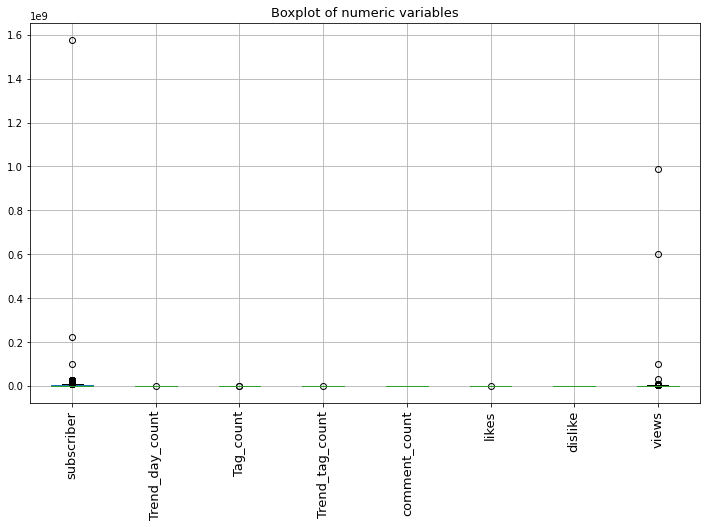

In [12]:
#set the plot size using figure() 
plt.figure(figsize = (12,7))

# plot a boxplot to visualize the outliers
df_numeric_features.boxplot()

#set the title
plt.title('Boxplot of numeric variables', fontsize = 13)

# xticks(ticks) gives the x-axis tick values
plt.xticks(rotation = 'vertical', fontsize = 13)

# display the plot
plt.show()

In [13]:
#creating a function 'imputepreceding_values' to fill with na values
#fillna method fills all the missing values with preceding value
def imputepreceding_values(data):
    
    data.comment_disabled.fillna(method ='ffill', inplace=True)
    data['like dislike disabled'].fillna(method ='ffill', inplace=True)
    data.category_id.fillna(method ='ffill', inplace=True)
    data['tag appered in title'].fillna(method ='ffill', inplace=True)
    print(data.isnull().sum())
    
#calling a function
#passing the dataset (youtube_views)
imputepreceding_values(youtube_views)

category_id                 0
subscriber                 23
Trend_day_count             1
Tag_count                   2
Trend_tag_count             3
comment_count            1015
comment_disabled            0
like dislike disabled       0
likes                       1
dislike                     1
tag appered in title        0
views                       1
dtype: int64


In [14]:
#creating a function 'impute_median_values'
#fillna method fills all the missing values with preceding value

def impute_median_values(data):
    data.Trend_day_count.fillna(data.Trend_day_count.median(), inplace=True)
    data.Tag_count.fillna(data.Tag_count.median(), inplace=True)
    data.Trend_tag_count.fillna(data.Trend_tag_count.median(), inplace=True)
    data.comment_count.fillna(data.comment_count.median(), inplace=True)
    data.likes.fillna(data.likes.median(), inplace=True)
    data.dislike.fillna(data.dislike.median(), inplace=True)
    data.views.fillna(data.views.median(), inplace=True)
    data.subscriber.fillna(data.subscriber.median(), inplace=True) 
    print(data.isnull().sum())

#calling a 'function
impute_median_values(youtube_views)

category_id              0
subscriber               0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag appered in title     0
views                    0
dtype: int64


In [15]:
def handleOutliers(data):
     #include all numeric data
    df_num = data.select_dtypes(include=['int64','float64' ])
    
    # #calculating z-score by passing all numeric varibale
    z = np.abs(stats.zscore(df_num))
    
    #threshold = 3
    x= np.where(z > 3)
    
    #droping the variables 
    data.drop(data.index[x[:1]], inplace=True)
    
    #printing the skewness of each variable
    print(df_num.skew())
    

#calling the function
handleOutliers(youtube_views)

subscriber        52.424693
Trend_day_count   56.386890
Tag_count         39.715994
Trend_tag_count   56.539992
comment_count     -0.001841
likes             48.558249
dislike            0.242662
views             42.624127
dtype: float64


In [16]:
#reset_index allows you to reset all the values
youtube_views = youtube_views.reset_index(drop = True)

In [17]:
youtube_views.views = ((youtube_views.views) ** (1/3))
youtube_views.subscriber = ((youtube_views.subscriber) ** (1/3))

In [18]:
youtube_views.skew()

subscriber              0.429171
Trend_day_count        -0.035211
Tag_count              -0.020947
Trend_tag_count        -0.008223
comment_count          -0.001994
likes                  -0.062985
dislike                 0.240400
tag appered in title   -0.676695
views                   0.784550
dtype: float64

In [19]:
#isnull().sum() returns the number of missing values in each variable
#ascending = False sorts values in the descending order
Total = youtube_views.isnull().sum().sort_values(ascending=False) 
Total

views                    0
tag appered in title     0
dislike                  0
likes                    0
like dislike disabled    0
comment_disabled         0
comment_count            0
Trend_tag_count          0
Tag_count                0
Trend_day_count          0
subscriber               0
category_id              0
dtype: int64

In [20]:
#ascending = False sorts the values in the descending order
Percentage = (youtube_views.isnull().sum()*100/youtube_views.isnull().count()).sort_values(ascending=False)   

#concat the 'Total' and 'Percentage' columns using concat()
missing_data = pd.concat([Total, Percentage], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
views,0,0.000000
tag appered in title,0,0.000000
dislike,0,0.000000
likes,0,0.000000
like dislike disabled,0,0.000000
comment_disabled,0,0.000000
comment_count,0,0.000000
Trend_tag_count,0,0.000000
Tag_count,0,0.000000
Trend_day_count,0,0.000000


In [21]:
#convert 'tag appered in title' into datatype object
youtube_views['tag appered in title'] = youtube_views['tag appered in title'].astype('object')

#convert 'category_id' into datatype object
youtube_views['category_id'] = youtube_views['category_id'].astype('object')

In [22]:
#convert 'comment_disabled' into datatype string
youtube_views['comment_disabled'] = youtube_views['comment_disabled'].astype('str')

#convert 'like dislike disable' into datatype string
youtube_views['like dislike disabled'] = youtube_views['like dislike disabled'].astype('str')

In [23]:
#Converting comment_disabled into lowercase
youtube_views.comment_disabled = youtube_views.comment_disabled.str.lower()

#Converting like dislike disabled into lowercase
youtube_views['like dislike disabled'] = youtube_views['like dislike disabled'].str.lower()

In [24]:
# filter the numerical features in the dataset
df_numeric_features = youtube_views.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features.head()

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views
0,208.669915,6.000000,21.000000,6.000000,163785.000000,13342.000000,6089.000000,125.549115
1,181.076797,1.000000,23.000000,1.000000,116266.000000,5761.000000,3044.000000,114.162025
2,161.230217,10.000000,22.000000,3.000000,257850.000000,0.000000,0.000000,114.524870
3,236.252005,12.000000,17.000000,5.000000,263939.000000,0.000000,0.000000,152.108043
4,273.965728,11.000000,15.000000,7.000000,268085.000000,0.000000,0.000000,169.099902


In [25]:
# filter the numerical features in the dataset
df_categorial_features = youtube_views.select_dtypes(include=[np.object])

# display the first five observations
df_categorial_features.head()

,category_id,comment_disabled,like dislike disabled,tag appered in title
0,22,false,false,False
1,24,true,false,False
2,23,true,true,True
3,24,true,true,True
4,24,true,true,True


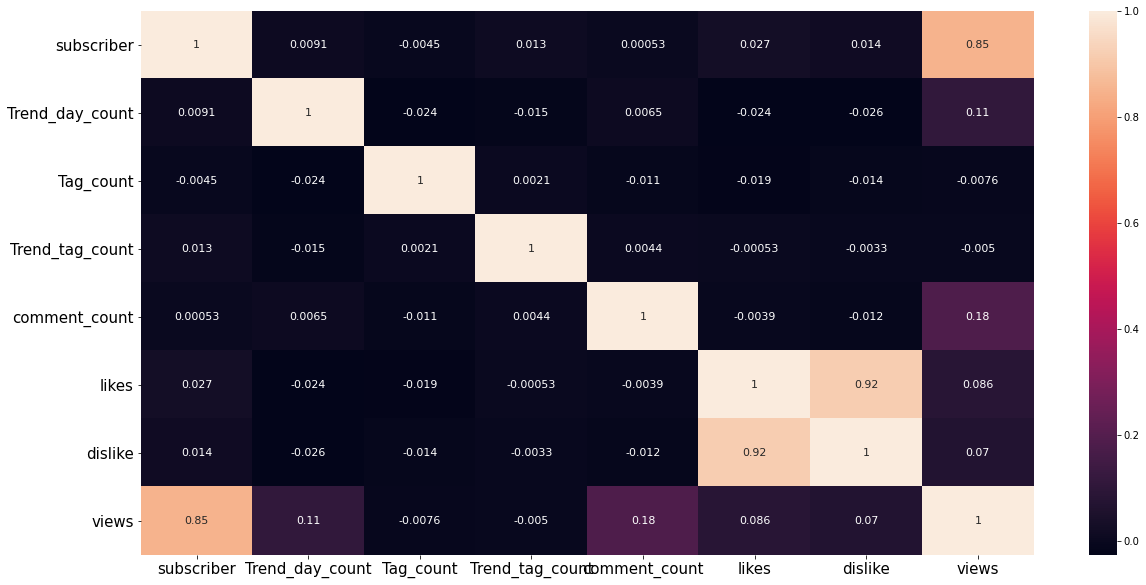

In [26]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
sns.heatmap(df_numeric_features.corr(), annot = True, annot_kws = {"size": 11})

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

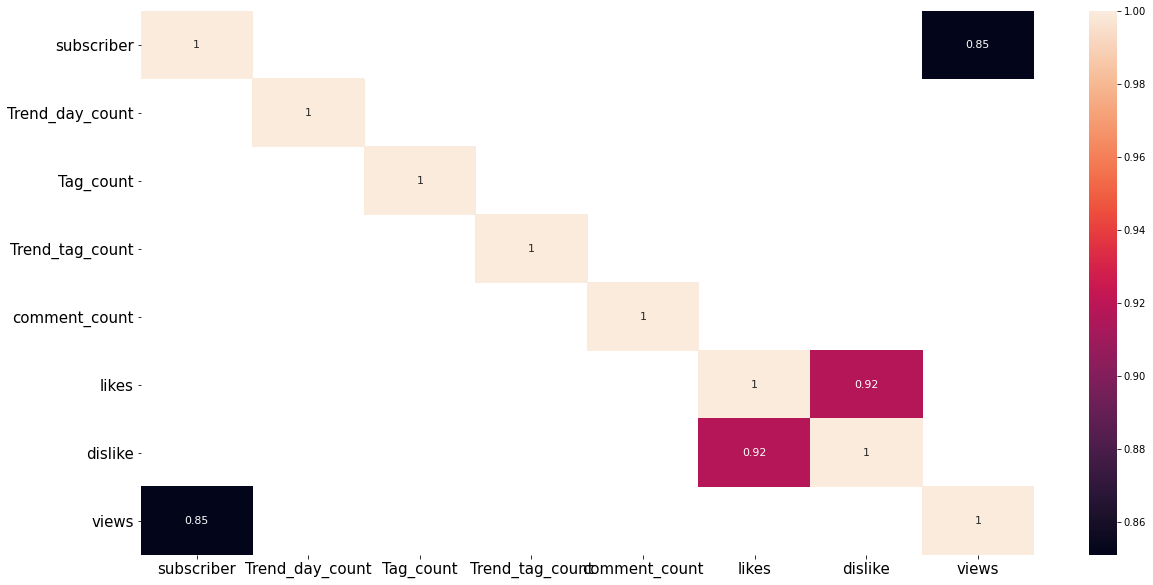

In [59]:
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix

sns.heatmap(df_numeric_features.corr()[np.abs(youtube_views.corr()) > 0.6], annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()